In [1]:
#importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
import requests
from bs4 import BeautifulSoup
import sklearn,scipy
from datetime import date,datetime
from urllib.request import Request, urlopen
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
import gc

In [2]:
#checking for permission if we can extract data from the website

url = "https://www.worldometers.info/world-population/population-by-country/"
print(requests.get(url))
#print(requests.get(url).text)

<Response [200]>


In [3]:
url = "https://www.worldometers.info/world-population/population-by-country/"
request = Request(url)
webpage = urlopen(request)
print(webpage)

In [4]:
page = BeautifulSoup(webpage, "html.parser")

In [5]:
table = page.findAll("table",{'id':'example2'})
container = table[0].findAll('tr',{"style":""})
title = container[0]
del container[0]


all_data  = []
clean = True

for country in container:
    country_data = []
    country_container = country.findAll('td')
    for i in range(1, len(country_container)):
        final_feature = country_container[i].text
        if clean:
            if i!= 1:
                final_feature = final_feature.replace(",","")
                if final_feature.find('%') != -1 or final_feature.find(' %') != -1:
                    final_feature = final_feature.replace("%","")
                if final_feature.find("-") != -1:
                    final_feature = float(final_feature)
            if final_feature =='N.A.':
                final_feature = 0
            elif final_feature =="" or final_feature == " ":
                final_feature= -1
            country_data.append(final_feature)
    all_data.append(country_data)

In [6]:
all_data[:2]

[['India',
  '1428627663',
  '0.81 ',
  '11454490',
  '481',
  '2973190',
  -486136.0,
  '2.0',
  '28',
  '36 ',
  '17.76 '],
 ['China',
  '1425671352',
  -0.02,
  -215985.0,
  '152',
  '9388211',
  -310220.0,
  '1.2',
  '39',
  '65 ',
  '17.72 ']]

In [7]:
pop_df = pd.DataFrame(all_data)
pop_df

,0,1,2,3,4,5,6,7,8,9,10
0,India,1428627663,0.81,11454490,481,2973190,-486136.0,2.0,28,36,17.76
1,China,1425671352,-0.02,-215985.0,152,9388211,-310220.0,1.2,39,65,17.72
2,United States,339996563,0.50,1706706,37,9147420,999700,1.7,38,83,4.23
3,Indonesia,277534122,0.74,2032783,153,1811570,-49997.0,2.1,30,59,3.45
4,Pakistan,240485658,1.98,4660796,312,770880,-165988.0,3.3,21,35,2.99
...,...,...,...,...,...,...,...,...,...,...,...
229,Montserrat,4386,-0.09,-4.0,44,100,0,1.6,44,11,0.00
230,Falkland Islands,3791,0.29,11,0,12170,0,1.6,40,62,0.00
231,Niue,1935,0.05,1,7,260,0,2.4,36,41,0.00
232,Tokelau,1893,1.18,22,189,10,0,2.6,27,0,0.00


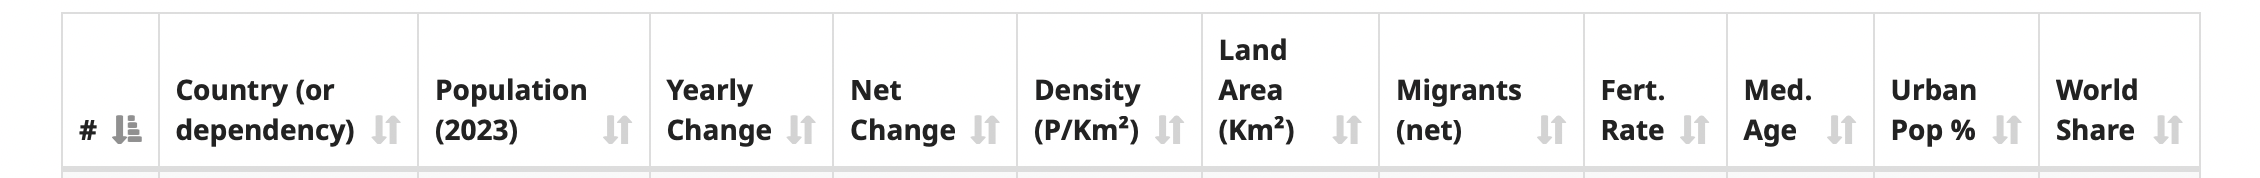

In [8]:
columns = ["Country","Population (2023)","Yearly Change %","Net Change","Density (P/Km2)","Land Area (Km2)",
           "Migrants (net)","Fert. Rate","Med. Age","Urban Pop %","World Share %"]

In [9]:
pop_df.columns = columns
pop_df

,Country,Population (2023),Yearly Change %,Net Change,Density (P/Km2),Land Area (Km2),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share %
0,India,1428627663,0.81,11454490,481,2973190,-486136.0,2.0,28,36,17.76
1,China,1425671352,-0.02,-215985.0,152,9388211,-310220.0,1.2,39,65,17.72
2,United States,339996563,0.50,1706706,37,9147420,999700,1.7,38,83,4.23
3,Indonesia,277534122,0.74,2032783,153,1811570,-49997.0,2.1,30,59,3.45
4,Pakistan,240485658,1.98,4660796,312,770880,-165988.0,3.3,21,35,2.99
...,...,...,...,...,...,...,...,...,...,...,...
229,Montserrat,4386,-0.09,-4.0,44,100,0,1.6,44,11,0.00
230,Falkland Islands,3791,0.29,11,0,12170,0,1.6,40,62,0.00
231,Niue,1935,0.05,1,7,260,0,2.4,36,41,0.00
232,Tokelau,1893,1.18,22,189,10,0,2.6,27,0,0.00


In [10]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country            234 non-null    object
 1   Population (2023)  234 non-null    object
 2   Yearly Change %    234 non-null    object
 3   Net Change         234 non-null    object
 4   Density (P/Km2)    234 non-null    object
 5   Land Area (Km2)    234 non-null    object
 6   Migrants (net)     234 non-null    object
 7   Fert. Rate         234 non-null    object
 8   Med. Age           234 non-null    object
 9   Urban Pop %        234 non-null    object
 10  World Share %      234 non-null    object
dtypes: object(11)
memory usage: 20.2+ KB


In [11]:
for i in pop_df.columns:
    if i != 'Country':
        pop_df[i] = pd.to_numeric(pop_df[i])

In [12]:
pop_df.head()

,Country,Population (2023),Yearly Change %,Net Change,Density (P/Km2),Land Area (Km2),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share %
0,India,1428627663,0.81,11454490.0,481,2973190,-486136.0,2.0,28,36,17.76
1,China,1425671352,-0.02,-215985.0,152,9388211,-310220.0,1.2,39,65,17.72
2,United States,339996563,0.50,1706706.0,37,9147420,999700.0,1.7,38,83,4.23
3,Indonesia,277534122,0.74,2032783.0,153,1811570,-49997.0,2.1,30,59,3.45
4,Pakistan,240485658,1.98,4660796.0,312,770880,-165988.0,3.3,21,35,2.99


In [13]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            234 non-null    object 
 1   Population (2023)  234 non-null    int64  
 2   Yearly Change %    234 non-null    float64
 3   Net Change         234 non-null    float64
 4   Density (P/Km2)    234 non-null    int64  
 5   Land Area (Km2)    234 non-null    int64  
 6   Migrants (net)     234 non-null    float64
 7   Fert. Rate         234 non-null    float64
 8   Med. Age           234 non-null    int64  
 9   Urban Pop %        234 non-null    int64  
 10  World Share %      234 non-null    float64
dtypes: float64(5), int64(5), object(1)
memory usage: 20.2+ KB


In [14]:
pop_df['Net Change'] = pop_df['Net Change'].astype(int)

In [15]:
pop_df['Migrants (net)'] = pop_df['Migrants (net)'].astype(int)

In [16]:
pop_df.head()

,Country,Population (2023),Yearly Change %,Net Change,Density (P/Km2),Land Area (Km2),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share %
0,India,1428627663,0.81,11454490,481,2973190,-486136,2.0,28,36,17.76
1,China,1425671352,-0.02,-215985,152,9388211,-310220,1.2,39,65,17.72
2,United States,339996563,0.50,1706706,37,9147420,999700,1.7,38,83,4.23
3,Indonesia,277534122,0.74,2032783,153,1811570,-49997,2.1,30,59,3.45
4,Pakistan,240485658,1.98,4660796,312,770880,-165988,3.3,21,35,2.99


In [17]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            234 non-null    object 
 1   Population (2023)  234 non-null    int64  
 2   Yearly Change %    234 non-null    float64
 3   Net Change         234 non-null    int64  
 4   Density (P/Km2)    234 non-null    int64  
 5   Land Area (Km2)    234 non-null    int64  
 6   Migrants (net)     234 non-null    int64  
 7   Fert. Rate         234 non-null    float64
 8   Med. Age           234 non-null    int64  
 9   Urban Pop %        234 non-null    int64  
 10  World Share %      234 non-null    float64
dtypes: float64(3), int64(7), object(1)
memory usage: 20.2+ KB


In [18]:
top10 = list(pop_df['Country'][:10])
top10

['India',
 'China',
 'United States',
 'Indonesia',
 'Pakistan',
 'Nigeria',
 'Brazil',
 'Bangladesh',
 'Russia',
 'Mexico']

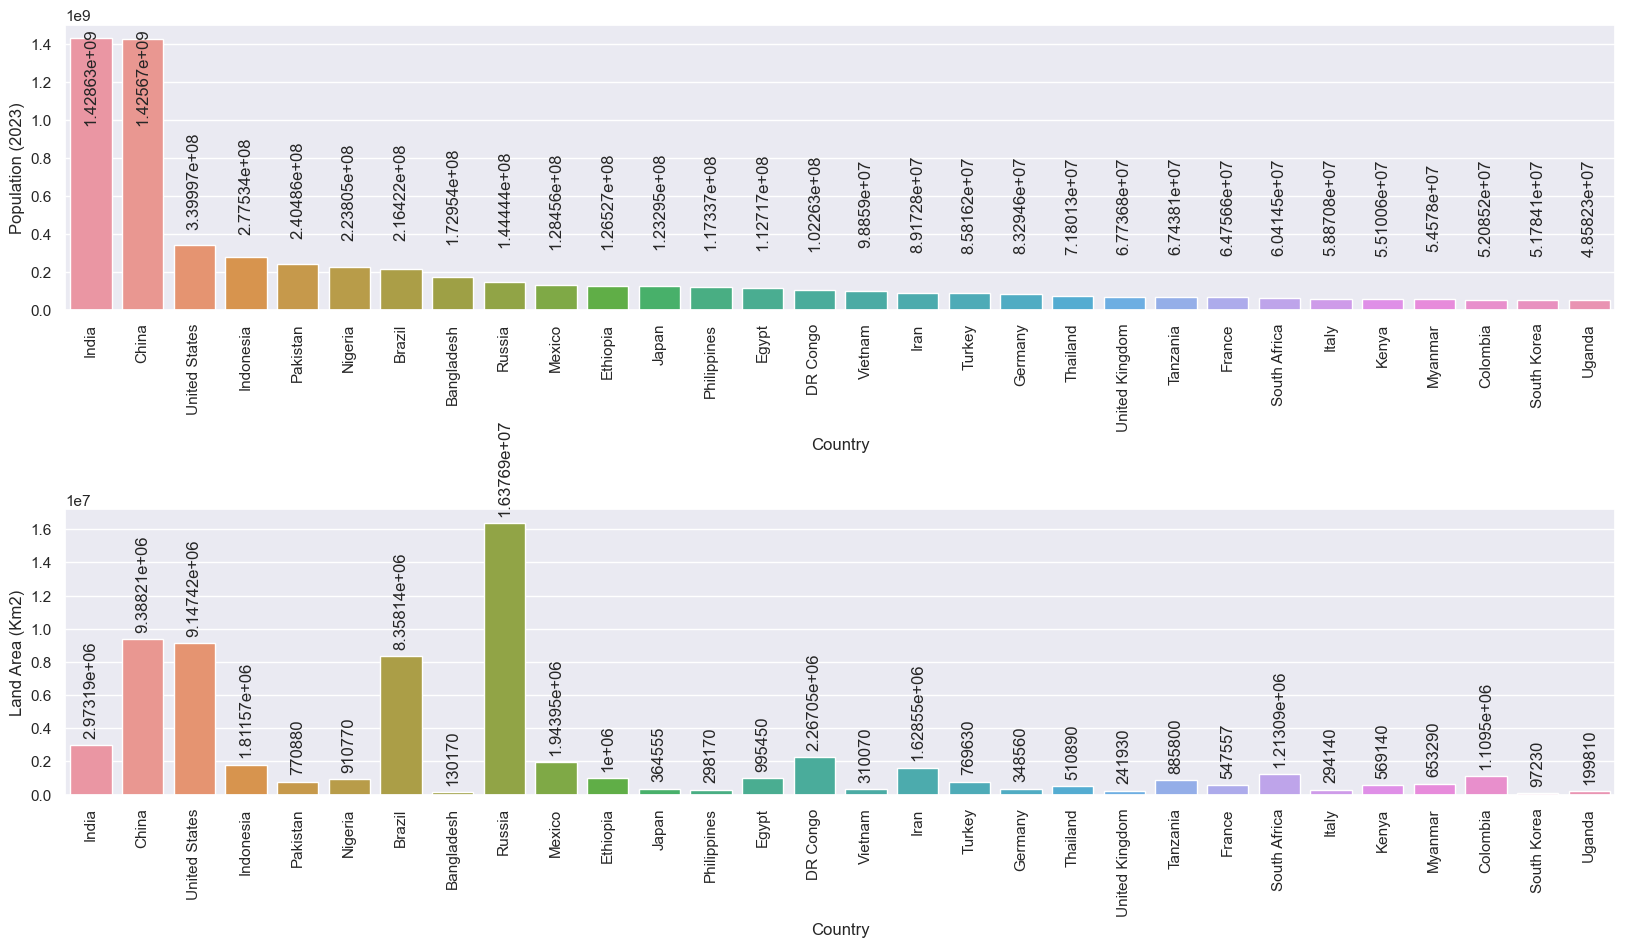

In [19]:
plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
ax = sns.barplot(pop_df, x = pop_df['Country'][:30], y = pop_df['Population (2023)'][:30])
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0],rotation = 90, padding = 70.0, label_type = 'center')
plt.subplots_adjust(hspace = 0.7)
plt.subplot(2,1,2)
ax1 = sns.barplot(pop_df, x = pop_df['Country'][:30], y = pop_df['Land Area (Km2)'][:30])
plt.xticks(rotation = 90)
ax1.bar_label(ax1.containers[0],rotation = 90, padding = 5.0)
plt.show()

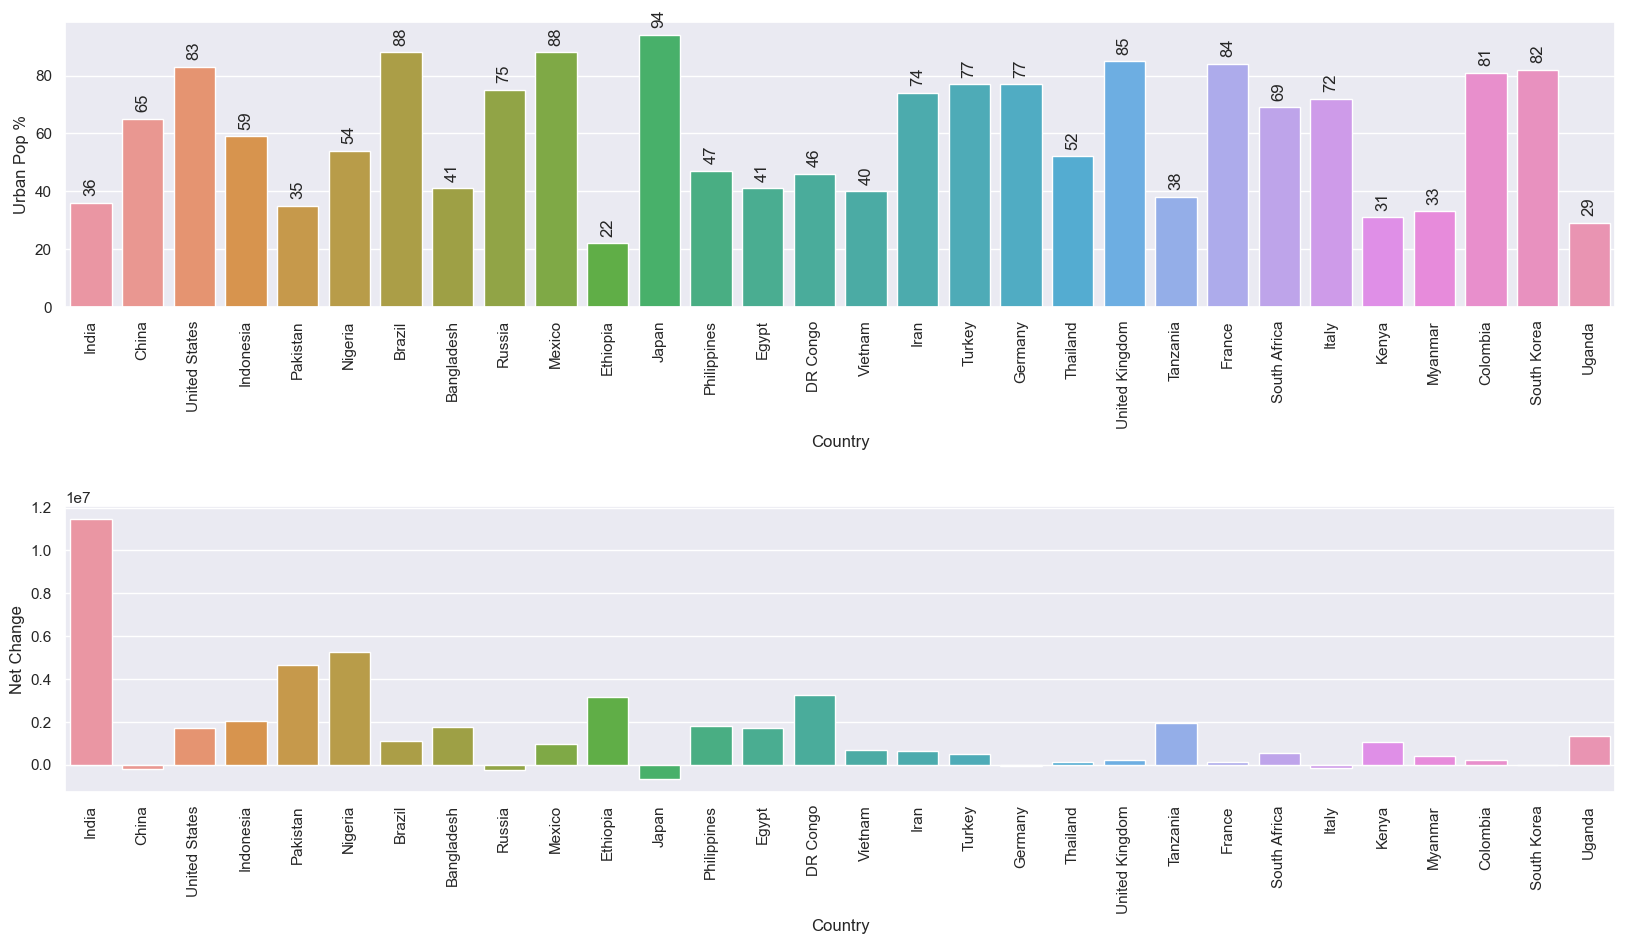

In [20]:
plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
ax = sns.barplot(pop_df, x = pop_df['Country'][:30], y = pop_df['Urban Pop %'][:30])
ax.bar_label(ax.containers[0],rotation = 90, padding = 5.0)
plt.xticks(rotation = 90)
plt.subplots_adjust(hspace = 0.7)
plt.subplot(2,1,2)
sns.barplot(pop_df, x = pop_df['Country'][:30], y = pop_df['Net Change'][:30])
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='Population (2023)'>

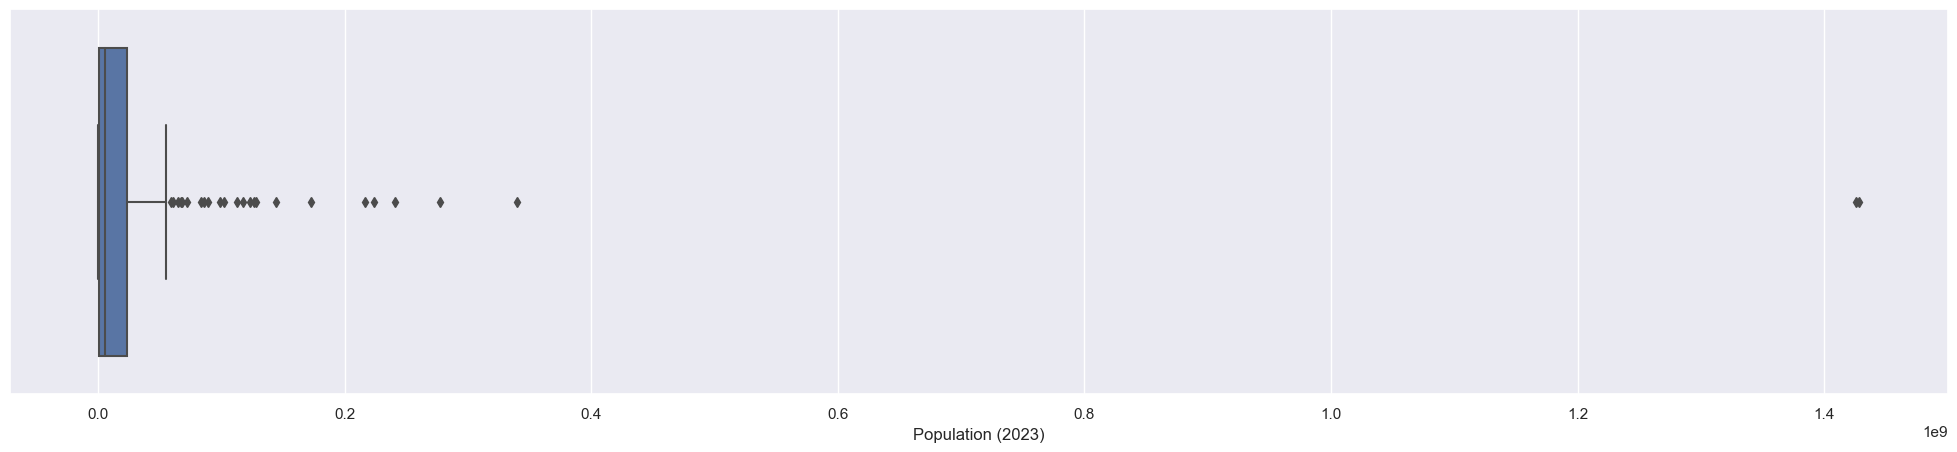

In [21]:
plt.figure(figsize=(25,5))
sns.boxplot(data = pop_df, x = 'Population (2023)')

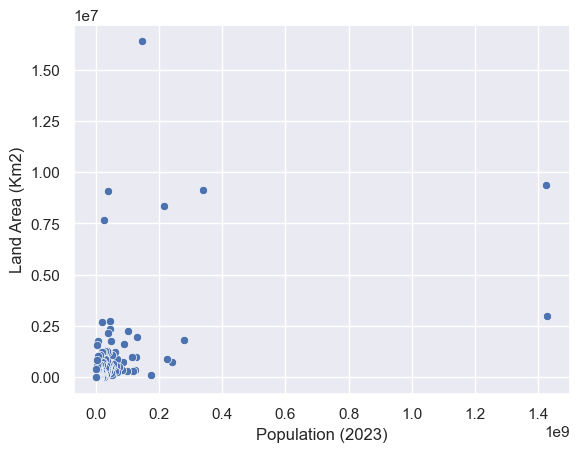

In [22]:
sns.scatterplot(data = pop_df, x = 'Population (2023)', y = 'Land Area (Km2)')
plt.show()

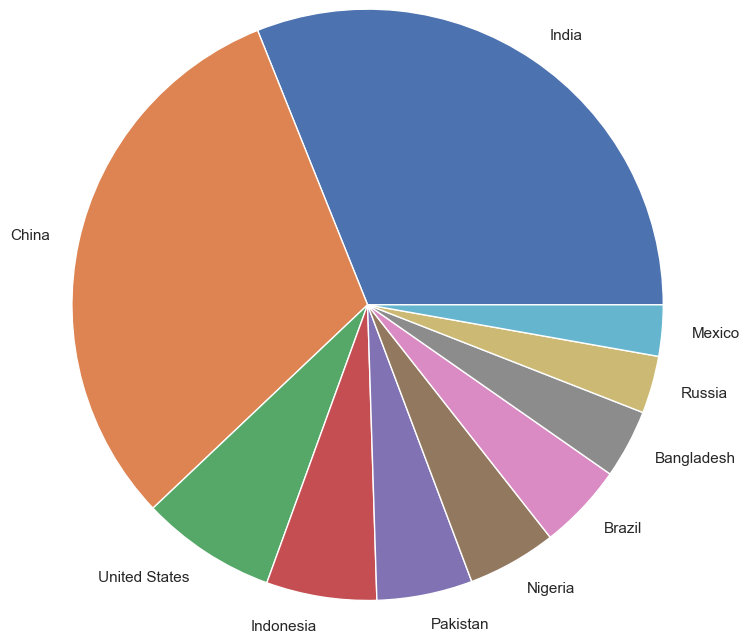

In [23]:
#explode = (0.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0)
plt.pie(x = pop_df['Population (2023)'][:10], labels = pop_df['Country'][:10], radius = 2)
plt.show()

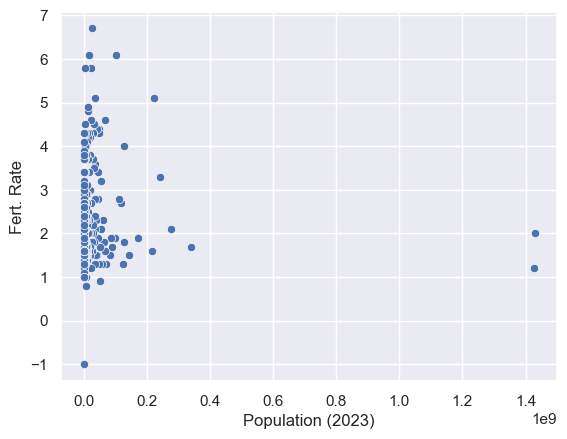

In [24]:
sns.scatterplot(data = pop_df, x = 'Population (2023)',y = 'Fert. Rate')
plt.show()

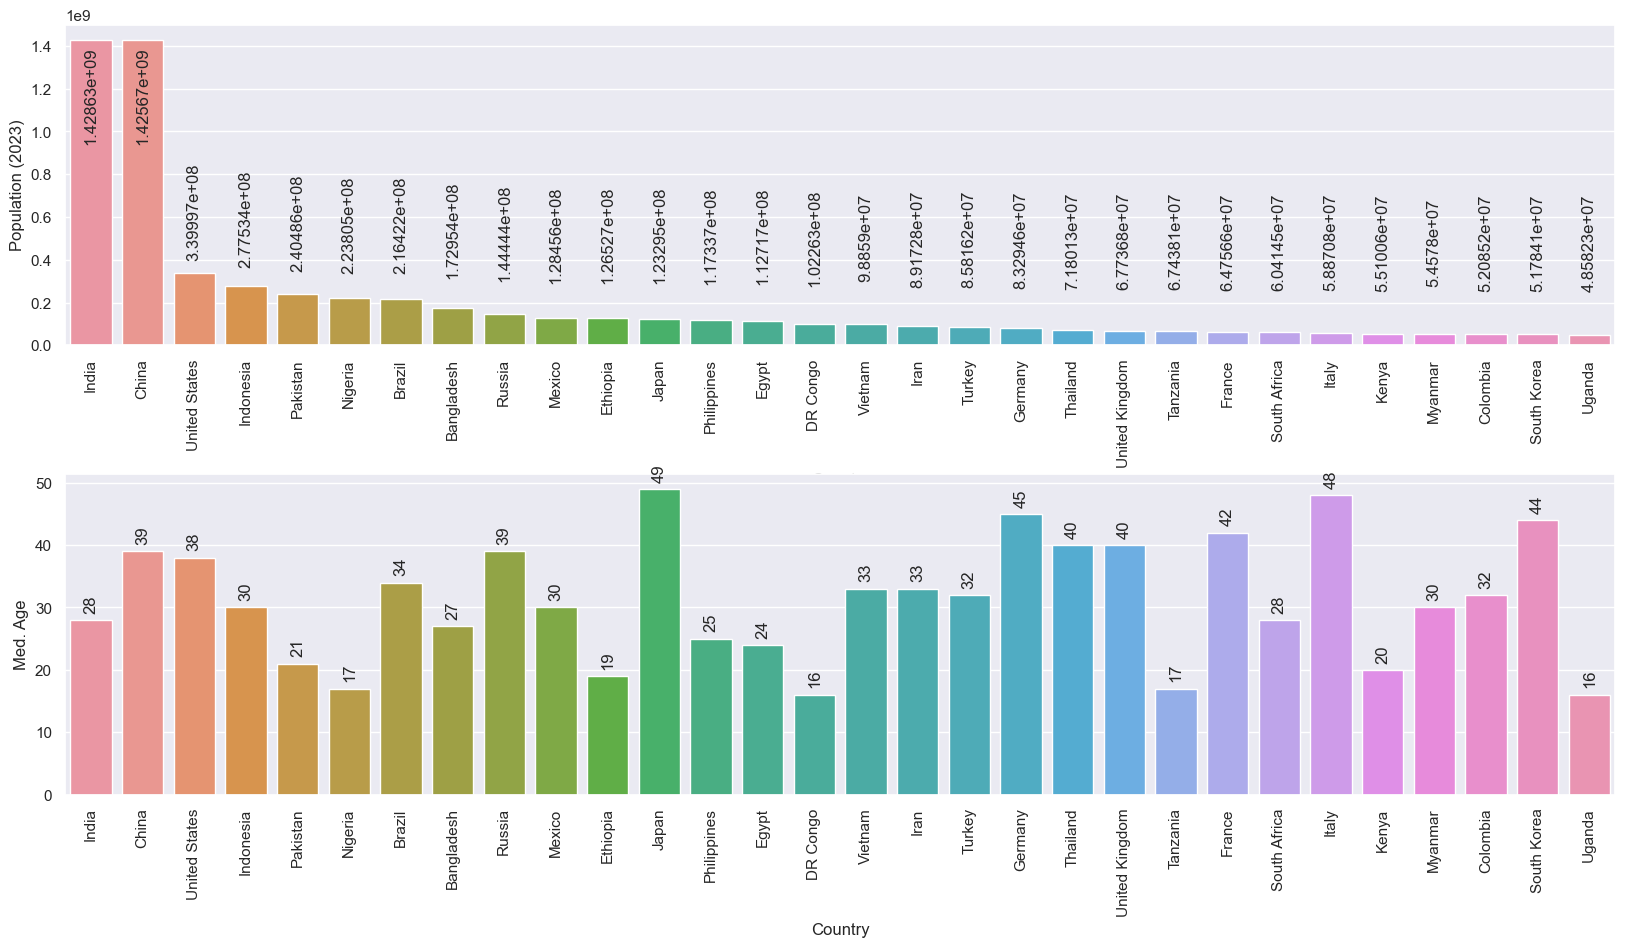

In [25]:
plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
ax = sns.barplot(pop_df, x = pop_df['Country'][:30], y = pop_df['Population (2023)'][:30])
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0],rotation = 90, padding = 70.0, label_type = 'center')
plt.subplots_adjust(hspace = 0.4)
plt.subplot(2,1,2)
ax1 = sns.barplot(pop_df, x = pop_df['Country'][:30], y = pop_df['Med. Age'][:30])
plt.xticks(rotation = 90)
ax1.bar_label(ax1.containers[0],rotation = 90, padding = 5.0, label_type = 'edge')
plt.show()